In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
xls_data=pd.read_excel("./table.xlsx")

In [3]:
t2_dat=xls_data.loc[:,"# of turns":"HFSS"]

In [4]:
t4_dat=xls_data.loc[:,"# of turns.2":"HFSS.2"]

In [5]:
t2_dat=t2_dat.replace(np.nan,0)
t4_dat=t4_dat.replace(np.nan,0)

In [6]:
def data_restore(dat):
    for col_name in dat.columns[:5]:
        temp=0
        for i in range(len(dat[col_name])):
            if (dat.loc[i,col_name]!=0):
                temp=dat.loc[i,col_name]
            if (dat.loc[i,col_name]==0):
                dat.loc[i,col_name]=temp
    return dat

In [7]:
t2_dat=data_restore(t2_dat)
t4_dat=data_restore(t4_dat)

In [8]:
total_dat_temp=np.vstack([t2_dat.values,t4_dat.values])

In [9]:
del_index=np.where(total_dat_temp[:,6]==0)[0]

In [10]:
total_dat_temp=pd.DataFrame(total_dat_temp,columns=t2_dat.columns)

In [11]:
total_dat=total_dat_temp.drop(del_index)

In [12]:
total_dat.to_csv("preprocessed_data.csv",
                 columns=total_dat.columns,sep=",", index=False)

In [13]:
data=total_dat.values

In [14]:
log_dat_x=np.log(data[:,:6])

In [15]:
log_dat_y=np.log(data[:,6])

In [16]:
x_train=np.hstack([log_dat_x,data[:,:6]])

In [17]:
mean_x=np.mean(x_train, axis=0)
std_x=np.std(x_train, axis=0)

In [18]:
x_train=(x_train - mean_x) / std_x

In [19]:
mean_y=np.mean(log_dat_y)
std_y=np.std(log_dat_y)

In [20]:
y_train=(log_dat_y-mean_y)/std_y

In [21]:
x_train=torch.FloatTensor(x_train)
y_train=torch.FloatTensor(y_train)

In [22]:
model=nn.Linear(12,1)

In [23]:
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.2021, -0.1503, -0.2851,  0.0269, -0.0324,  0.0855, -0.0690,  0.0319,
         -0.0123,  0.1856, -0.1749,  0.0838]], requires_grad=True), Parameter containing:
tensor([-0.0102], requires_grad=True)]


In [24]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

In [25]:
nb_epochs = 100000
for epoch in range(nb_epochs+1):

    prediction = torch.squeeze(model(x_train))
    cost = F.mse_loss(prediction, y_train) 
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/100000 Cost: 1.417822
Epoch  100/100000 Cost: 1.407491
Epoch  200/100000 Cost: 1.397242
Epoch  300/100000 Cost: 1.387073
Epoch  400/100000 Cost: 1.376984
Epoch  500/100000 Cost: 1.366974
Epoch  600/100000 Cost: 1.357044
Epoch  700/100000 Cost: 1.347191
Epoch  800/100000 Cost: 1.337415
Epoch  900/100000 Cost: 1.327717
Epoch 1000/100000 Cost: 1.318095
Epoch 1100/100000 Cost: 1.308548
Epoch 1200/100000 Cost: 1.299077
Epoch 1300/100000 Cost: 1.289679
Epoch 1400/100000 Cost: 1.280355
Epoch 1500/100000 Cost: 1.271104
Epoch 1600/100000 Cost: 1.261927
Epoch 1700/100000 Cost: 1.252821
Epoch 1800/100000 Cost: 1.243786
Epoch 1900/100000 Cost: 1.234822
Epoch 2000/100000 Cost: 1.225928
Epoch 2100/100000 Cost: 1.217104
Epoch 2200/100000 Cost: 1.208349
Epoch 2300/100000 Cost: 1.199663
Epoch 2400/100000 Cost: 1.191044
Epoch 2500/100000 Cost: 1.182493
Epoch 2600/100000 Cost: 1.174009
Epoch 2700/100000 Cost: 1.165592
Epoch 2800/100000 Cost: 1.157239
Epoch 2900/100000 Cost: 1.148952
Epoch 3000

Epoch 24800/100000 Cost: 0.276113
Epoch 24900/100000 Cost: 0.274557
Epoch 25000/100000 Cost: 0.273012
Epoch 25100/100000 Cost: 0.271478
Epoch 25200/100000 Cost: 0.269956
Epoch 25300/100000 Cost: 0.268445
Epoch 25400/100000 Cost: 0.266944
Epoch 25500/100000 Cost: 0.265455
Epoch 25600/100000 Cost: 0.263977
Epoch 25700/100000 Cost: 0.262509
Epoch 25800/100000 Cost: 0.261053
Epoch 25900/100000 Cost: 0.259606
Epoch 26000/100000 Cost: 0.258170
Epoch 26100/100000 Cost: 0.256745
Epoch 26200/100000 Cost: 0.255330
Epoch 26300/100000 Cost: 0.253926
Epoch 26400/100000 Cost: 0.252532
Epoch 26500/100000 Cost: 0.251148
Epoch 26600/100000 Cost: 0.249773
Epoch 26700/100000 Cost: 0.248410
Epoch 26800/100000 Cost: 0.247056
Epoch 26900/100000 Cost: 0.245711
Epoch 27000/100000 Cost: 0.244377
Epoch 27100/100000 Cost: 0.243052
Epoch 27200/100000 Cost: 0.241736
Epoch 27300/100000 Cost: 0.240431
Epoch 27400/100000 Cost: 0.239135
Epoch 27500/100000 Cost: 0.237848
Epoch 27600/100000 Cost: 0.236571
Epoch 27700/10

Epoch 49300/100000 Cost: 0.095942
Epoch 49400/100000 Cost: 0.095663
Epoch 49500/100000 Cost: 0.095387
Epoch 49600/100000 Cost: 0.095113
Epoch 49700/100000 Cost: 0.094840
Epoch 49800/100000 Cost: 0.094570
Epoch 49900/100000 Cost: 0.094301
Epoch 50000/100000 Cost: 0.094033
Epoch 50100/100000 Cost: 0.093768
Epoch 50200/100000 Cost: 0.093505
Epoch 50300/100000 Cost: 0.093243
Epoch 50400/100000 Cost: 0.092983
Epoch 50500/100000 Cost: 0.092724
Epoch 50600/100000 Cost: 0.092467
Epoch 50700/100000 Cost: 0.092213
Epoch 50800/100000 Cost: 0.091959
Epoch 50900/100000 Cost: 0.091708
Epoch 51000/100000 Cost: 0.091458
Epoch 51100/100000 Cost: 0.091209
Epoch 51200/100000 Cost: 0.090963
Epoch 51300/100000 Cost: 0.090718
Epoch 51400/100000 Cost: 0.090474
Epoch 51500/100000 Cost: 0.090233
Epoch 51600/100000 Cost: 0.089992
Epoch 51700/100000 Cost: 0.089753
Epoch 51800/100000 Cost: 0.089517
Epoch 51900/100000 Cost: 0.089281
Epoch 52000/100000 Cost: 0.089047
Epoch 52100/100000 Cost: 0.088815
Epoch 52200/10

Epoch 73400/100000 Cost: 0.061778
Epoch 73500/100000 Cost: 0.061716
Epoch 73600/100000 Cost: 0.061654
Epoch 73700/100000 Cost: 0.061593
Epoch 73800/100000 Cost: 0.061532
Epoch 73900/100000 Cost: 0.061471
Epoch 74000/100000 Cost: 0.061411
Epoch 74100/100000 Cost: 0.061351
Epoch 74200/100000 Cost: 0.061291
Epoch 74300/100000 Cost: 0.061232
Epoch 74400/100000 Cost: 0.061172
Epoch 74500/100000 Cost: 0.061114
Epoch 74600/100000 Cost: 0.061056
Epoch 74700/100000 Cost: 0.060998
Epoch 74800/100000 Cost: 0.060940
Epoch 74900/100000 Cost: 0.060882
Epoch 75000/100000 Cost: 0.060825
Epoch 75100/100000 Cost: 0.060768
Epoch 75200/100000 Cost: 0.060712
Epoch 75300/100000 Cost: 0.060656
Epoch 75400/100000 Cost: 0.060600
Epoch 75500/100000 Cost: 0.060544
Epoch 75600/100000 Cost: 0.060489
Epoch 75700/100000 Cost: 0.060434
Epoch 75800/100000 Cost: 0.060379
Epoch 75900/100000 Cost: 0.060325
Epoch 76000/100000 Cost: 0.060271
Epoch 76100/100000 Cost: 0.060217
Epoch 76200/100000 Cost: 0.060164
Epoch 76300/10

Epoch 98100/100000 Cost: 0.053077
Epoch 98200/100000 Cost: 0.053058
Epoch 98300/100000 Cost: 0.053039
Epoch 98400/100000 Cost: 0.053020
Epoch 98500/100000 Cost: 0.053001
Epoch 98600/100000 Cost: 0.052982
Epoch 98700/100000 Cost: 0.052963
Epoch 98800/100000 Cost: 0.052944
Epoch 98900/100000 Cost: 0.052925
Epoch 99000/100000 Cost: 0.052907
Epoch 99100/100000 Cost: 0.052888
Epoch 99200/100000 Cost: 0.052870
Epoch 99300/100000 Cost: 0.052852
Epoch 99400/100000 Cost: 0.052834
Epoch 99500/100000 Cost: 0.052815
Epoch 99600/100000 Cost: 0.052797
Epoch 99700/100000 Cost: 0.052779
Epoch 99800/100000 Cost: 0.052761
Epoch 99900/100000 Cost: 0.052743
Epoch 100000/100000 Cost: 0.052725


In [26]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.0104, -0.1555, -0.1395, -0.0604,  0.0031, -0.4924, -0.2815,  0.0308,
          0.1333,  0.0983, -0.1320, -0.3819]], requires_grad=True), Parameter containing:
tensor([-0.0014], requires_grad=True)]


In [27]:
x=np.squeeze(model(x_train).detach().numpy())

In [28]:
y=y_train.detach().numpy()

In [29]:
x.shape

(306,)

In [30]:
y.shape

(306,)

<function matplotlib.pyplot.show(*args, **kw)>

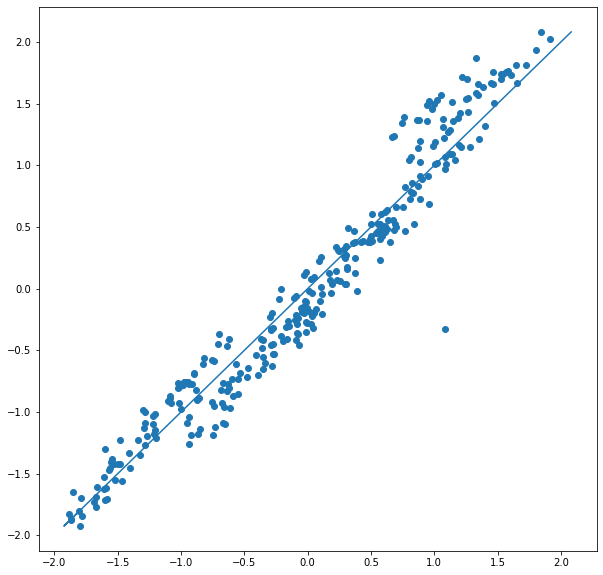

In [31]:
plt.figure(figsize=(10,10))
plt.plot(y,y)
plt.scatter(x, y)
plt.show